[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryansteed/image-gpt-bias/blob/master/notebooks/experiments.ipynb)

# Image GPT Bias
**Image Embedding Association Test**

Ryan Steed

This script adapted from https://colab.research.google.com/github/apeguero1/image-gpt/blob/master/Transformers_Image_GPT.ipynb.


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

%cd /Users/steed/caliskan/git/image-gpt-bias

/Users/steed/caliskan/git/image-gpt-bias


## Download Model

In [4]:
!nvidia-smi #OpenAI says you need 16GB GPU for the large model, but it may work if you lower n_sub_batch on the others.

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import urllib

# don't share these to Github or elsewhere!
u = "your_username"
p = urllib.parse.quote("your_password")
!git clone --recurse-submodules -j8 https://$u:$p@github.com/$u/image-gpt-bias.git
%cd image-gpt-bias

Cloning into 'image-gpt-bias'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 246 (delta 58), reused 205 (delta 32), pack-reused 0
Receiving objects: 100% (246/246), 1.41 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Submodule 'image-gpt' (https://github.com/openai/image-gpt) registered for path 'image-gpt'
Submodule 'weat' (https://github.com/ryansteed/weat) registered for path 'weat'
Cloning into '/content/image-gpt-bias/image-gpt'...
remote: Enumerating objects: 41, done.        
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Cloning into '/content/image-gpt-bias/weat'...
remote: Enumerating objects: 82, done.        
remote: Counting objects: 100% (82/82), done.        
remote: Compressing objects: 100% (55/55), done.        
remote: Total 82 (delta 25), reused 72 (delta 18), pack-reused 0        
Submodule path 'image-gpt': checked out '0cb1f2

In [4]:
# note - you may need to restart the kernel for these installations to take effect
!pip install -e .
!pip install -e weat

Obtaining file:///content/image-gpt-bias
  Found existing installation: ieat 1.0
    Can't uninstall 'ieat'. No files were found to uninstall.
  Running setup.py develop for ieat
Obtaining file:///content/image-gpt-bias/weat
  Found existing installation: weat 1.0
    Can't uninstall 'weat'. No files were found to uninstall.
  Running setup.py develop for weat


In [2]:
model_sizes = ["s", "m", "l"] #small medium large, xl not available
model_size = "s"
models_dir = "models"
color_clusters_dir = "clusters"
n_px = 32

In [6]:
# download the model - skip if already downloaded
!python image-gpt/download.py --model {model_size} --ckpt 1000000 --clusters --download_dir {models_dir}/{model_size}
!python image-gpt/download.py --clusters --download_dir {color_clusters_dir}

input args:
 {
    "download_dir":"models/l",
    "model":"l",
    "ckpt":"1000000",
    "clusters":true,
    "dataset":null
}
Fetching model.ckpt-1000000.data-00000-of-00064: 1.00kit [00:00, 694kit/s]      
Fetching model.ckpt-1000000.data-00001-of-00064: 252Mit [00:03, 64.2Mit/s]      
Fetching model.ckpt-1000000.data-00002-of-00064: 249Mit [00:03, 65.8Mit/s]      
Fetching model.ckpt-1000000.data-00003-of-00064: 249Mit [00:04, 62.1Mit/s]      
Fetching model.ckpt-1000000.data-00004-of-00064: 274Mit [00:04, 66.0Mit/s]      
Fetching model.ckpt-1000000.data-00005-of-00064: 255Mit [00:03, 65.0Mit/s]      
Fetching model.ckpt-1000000.data-00006-of-00064: 255Mit [00:04, 63.1Mit/s]      
Fetching model.ckpt-1000000.data-00007-of-00064: 264Mit [00:03, 70.4Mit/s]      
Fetching model.ckpt-1000000.data-00008-of-00064: 245Mit [00:03, 69.0Mit/s]      
Fetching model.ckpt-1000000.data-00009-of-00064: 258Mit [00:03, 68.4Mit/s]      
Fetching model.ckpt-1000000.data-00010-of-00064: 245Mit [00:03,

## Embedding Extraction

Prior implementations:
- SENT (w/ jiant) - https://github.com/W4ngatang/sent-bias
- Tan & Celis (w/ HuggingFace) - https://github.com/tanyichern/social-biases-contextualized

In [ ]:
from ieat.models import EmbeddingExtractor

extractor = EmbeddingExtractor(
    model_size=model_size,
    models_dir=models_dir,
    color_clusters_dir=color_clusters_dir,
    n_px=n_px
)
extractor

### Step-By-Step Demo

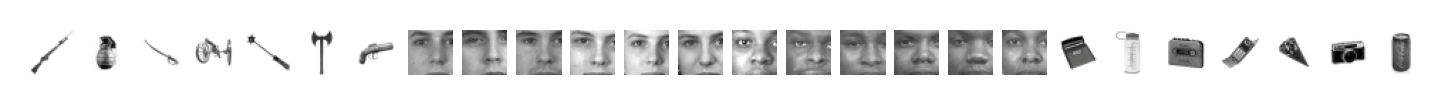

In [ ]:
test_dir = "data/weapon"
image_paths = [os.path.join(test_dir, d, f) for d in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, d))]
_ = extractor.process_samples(image_paths, visualize=True)

In [ ]:
output_path = "embeddings/weapon.csv"
extractor.extract(image_paths, output_path=output_path)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
img,,,,,,,,,,,,,,,,,,,,,
rifle.jpg,15.385178,10.567719,8.773263,9.552052,9.221087,13.118824,8.898617,10.505133,10.374969,8.633853,...,10.655484,8.040053,13.910337,16.142334,13.942163,10.575271,18.534674,21.963984,8.093419,11.735118
grenade.jpg,14.516444,10.309349,8.235927,9.635322,9.448365,12.370226,8.948378,10.386996,9.625449,8.528605,...,10.041757,8.135211,13.122416,15.392340,13.359159,10.189865,17.699184,21.547512,7.121128,11.751795
sword.jpg,14.875776,10.406982,8.429152,9.306886,8.957664,12.815912,8.654018,10.066076,9.859778,8.435455,...,10.418196,8.116982,13.643312,15.938161,13.595427,10.556729,17.745373,21.583744,7.709558,11.482836
cannon.jpg,15.714258,10.833429,8.496162,9.695824,9.544368,12.812616,9.147958,10.677876,10.455327,8.774539,...,10.404643,8.125225,14.155001,16.256985,14.132948,10.561037,18.479136,22.323254,8.037404,12.340572
mace.jpg,13.358615,8.931422,6.925794,7.954681,8.066824,10.997238,7.271123,8.948318,8.394958,7.035842,...,8.840185,6.401076,12.025066,14.224137,11.720935,9.065306,16.824419,20.122969,6.438962,10.177368
axe.jpg,15.442507,10.853559,8.301301,9.836548,9.284307,12.908263,9.304977,10.522963,10.545900,8.931809,...,9.745117,7.619501,13.660414,16.306650,13.722888,10.451452,17.973421,21.978298,7.986808,12.093969
revolver.jpg,15.994201,10.992706,8.763406,9.680336,9.366932,13.133907,8.920437,10.723027,10.475836,8.894149,...,10.912344,8.439634,14.241138,16.360710,14.088060,10.945549,18.426096,22.035797,8.190693,12.310879
wm1.jpg,0.053752,-2.679754,0.910424,-0.605343,0.336831,6.269164,-0.486558,-0.663159,-3.010507,-0.774463,...,0.250178,-1.601684,1.478524,1.463020,1.329845,-0.942064,16.745441,6.409237,-3.742612,-0.360373
wm6.jpg,-2.948333,-4.874415,-0.515118,-2.057206,-2.181390,3.704029,-2.670585,-2.289844,-3.943339,-3.158143,...,0.860211,-3.235828,-1.264703,-1.985677,-1.682443,0.030391,10.781816,3.555405,-6.047253,-2.695228


In [ ]:
# to download from colab
from google.colab import files

files.download(output_path)

## Experiments

### Baselines

In [49]:
import pandas as pd

valence_words = pd.read_csv("data/bgb_pleasant-words.csv").set_index("word")
q = 0.8
p = 0.8
m = 0.25

In [50]:
# high pleasantness
valence_words[
    (valence_words.pleasantness > valence_words.pleasantness.quantile(q=q)) &
    (valence_words.imagery > valence_words.imagery.quantile(q=p))
].sort_values("imagery", ascending=False)[["pleasantness", "imagery"]]

,pleasantness,imagery
word,,
beach,4.51,4.82
ocean,4.41,4.80
baby,4.45,4.79
mother,4.56,4.79
sunrise,4.68,4.75
diamond,4.51,4.74
rainbow,4.55,4.72
money,4.41,4.70
father,4.43,4.69


In [51]:
# low pleasantness
valence_words[
    (valence_words.pleasantness < valence_words.pleasantness.quantile(q=(1-q))) &
    (valence_words.imagery > valence_words.imagery.quantile(q=p-m))
].sort_values("imagery")[["pleasantness", "imagery"]]

,pleasantness,imagery
word,,
killer,1.20,3.82
fungus,1.60,3.82
rape,1.22,3.87
morgue,1.50,3.89
crucify,1.42,3.90
death,1.47,3.93
slum,1.46,3.94
devil,1.37,3.95
flabby,1.60,3.95


### IATs

**Weapons**

09/04 03:41:31 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:35 PM: Loading embeddings for black from file


black


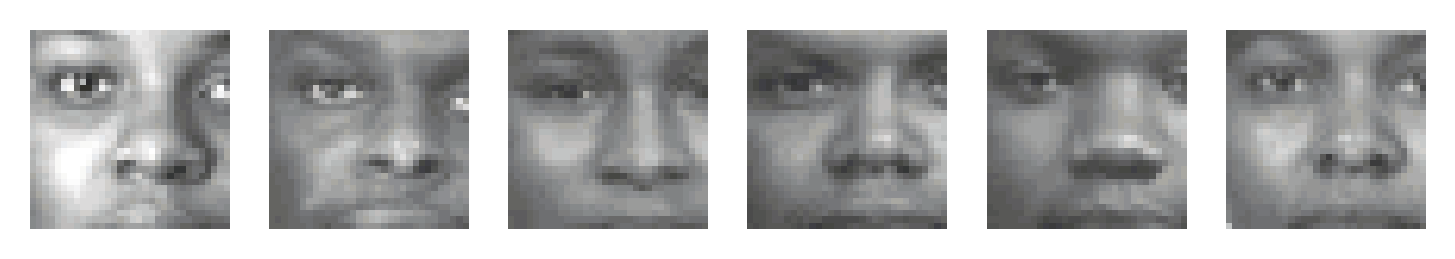

09/04 03:41:35 PM: Loading embeddings for white from file


white


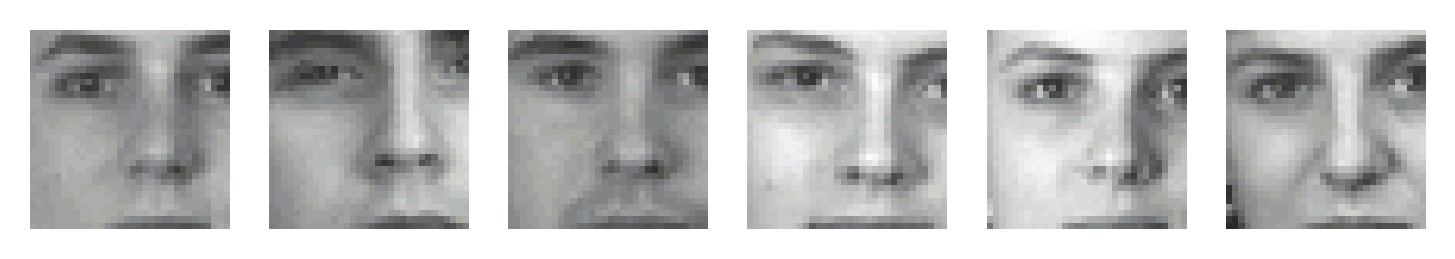

09/04 03:41:35 PM: Loading embeddings for tool from file


tool


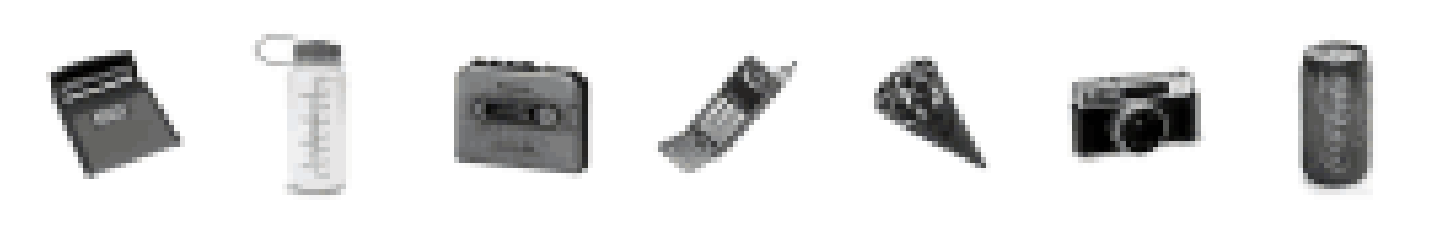

09/04 03:41:35 PM: Loading embeddings for weapon from file


weapon


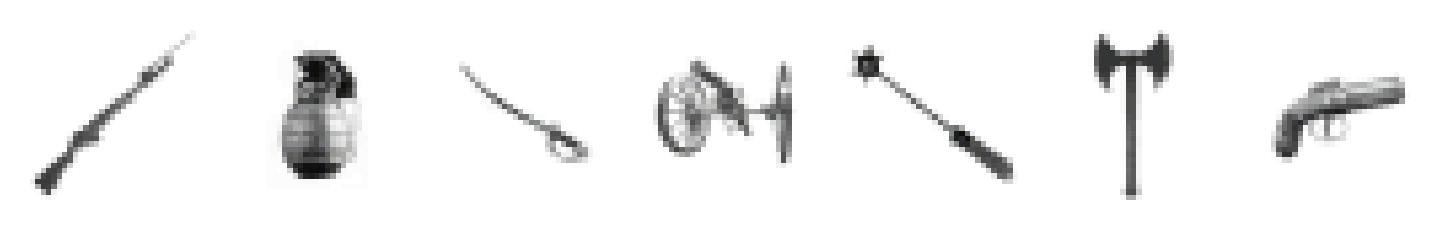

09/04 03:41:36 PM: Running test
09/04 03:41:36 PM: Computing cosine similarities...
09/04 03:41:36 PM: Null hypothesis: no difference between black and white in association to attributes tool and weapon
09/04 03:41:36 PM: Computing pval...
09/04 03:41:36 PM: Using non-parametric test
09/04 03:41:36 PM: Using exact test (924 partitions)
09/04 03:41:36 PM: Equalities contributed 1/924 to p-value
09/04 03:41:36 PM: pval: 0.00108225
09/04 03:41:36 PM: computing effect size...
09/04 03:41:36 PM: esize: 1.72154


(1.7215365956519384, 0.0010822510822510823)

In [34]:
from ieat.api import test

test(
    "data/experiments/weapon/black",
    "data/experiments/weapon/white",
    "data/experiments/weapon/tool",
    "data/experiments/weapon/weapon",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

In [11]:
# to download from colab
from google.colab import files

files.download("embeddings/weapon_l.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Native**

09/04 03:41:36 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:39 PM: Loading embeddings for euro from file


euro


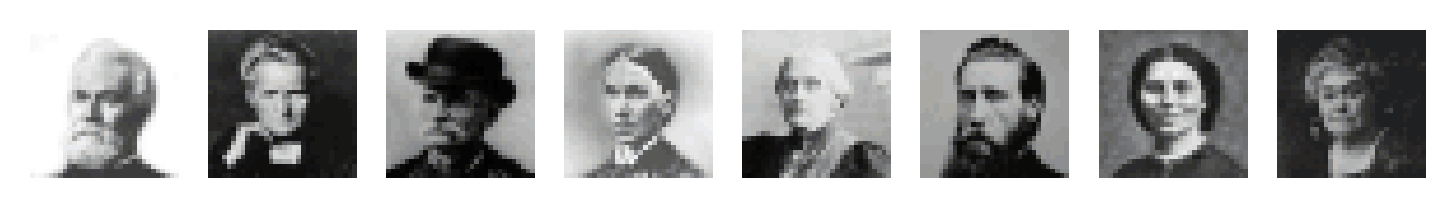

09/04 03:41:40 PM: Loading embeddings for native from file


native


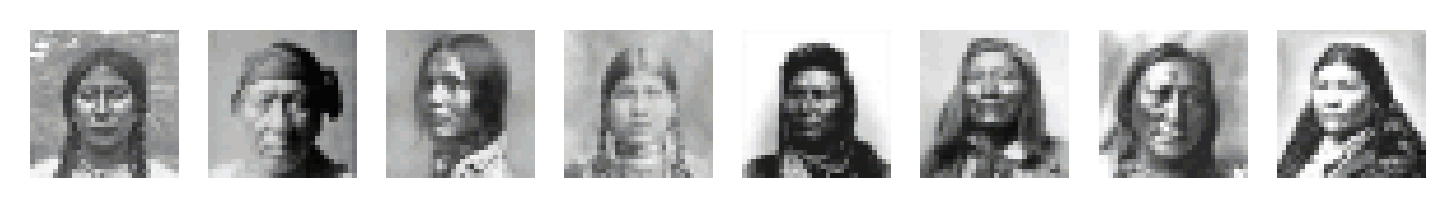

09/04 03:41:40 PM: Loading embeddings for us from file


us


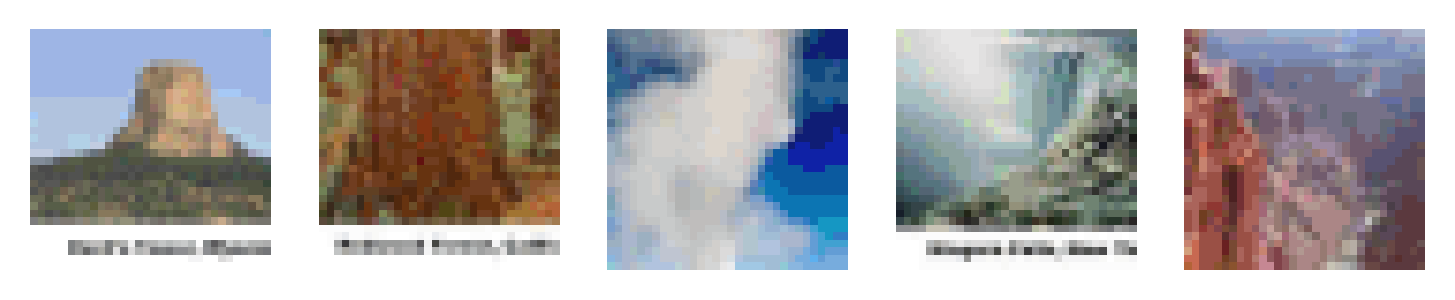

09/04 03:41:40 PM: Loading embeddings for world from file


world


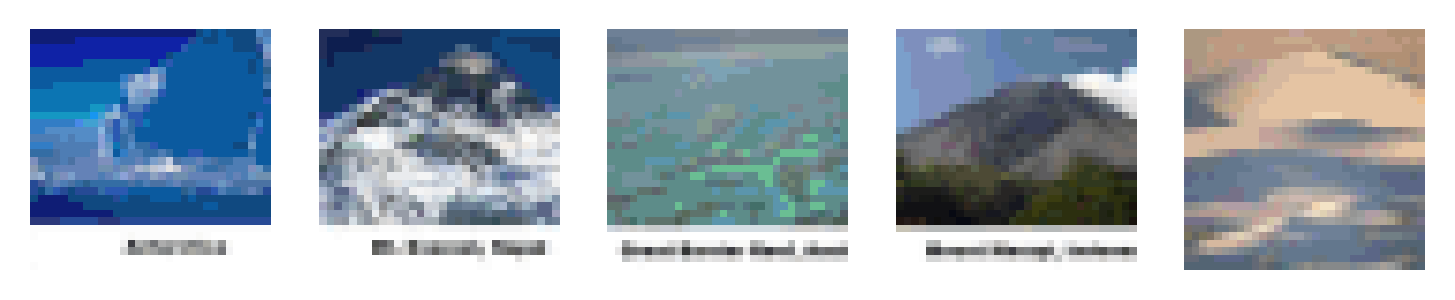

09/04 03:41:41 PM: Running test
09/04 03:41:41 PM: Computing cosine similarities...
09/04 03:41:41 PM: Null hypothesis: no difference between euro and native in association to attributes us and world
09/04 03:41:41 PM: Computing pval...
09/04 03:41:41 PM: Using non-parametric test
09/04 03:41:41 PM: Drawing 9999 samples (and biasing by 1)
09/04 03:41:41 PM: Equalities contributed 1/10000 to p-value
09/04 03:41:41 PM: pval: 0.0491
09/04 03:41:41 PM: computing effect size...
09/04 03:41:41 PM: esize: 0.808955


(0.808955195173936, 0.0491)

In [35]:
test(
    "data/experiments/native/euro",
    "data/experiments/native/native",
    "data/experiments/native/us",
    "data/experiments/native/world",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

In [14]:
# to download from colab
from google.colab import files

files.download("embeddings/native_l.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Asian**

09/04 03:41:41 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:44 PM: Loading embeddings for european-american from file


european-american


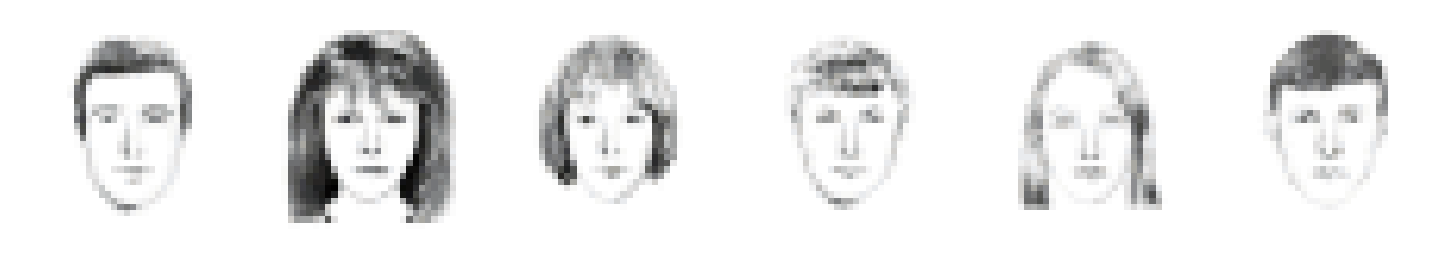

09/04 03:41:45 PM: Loading embeddings for asian-american from file


asian-american


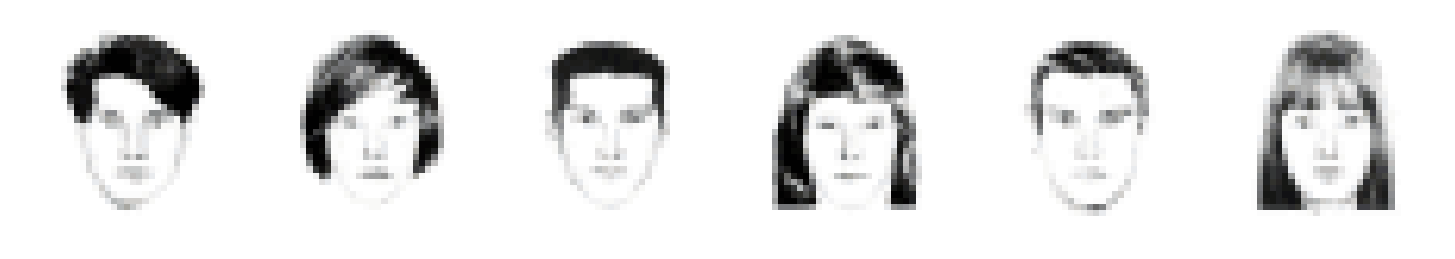

09/04 03:41:45 PM: Loading embeddings for american from file


american


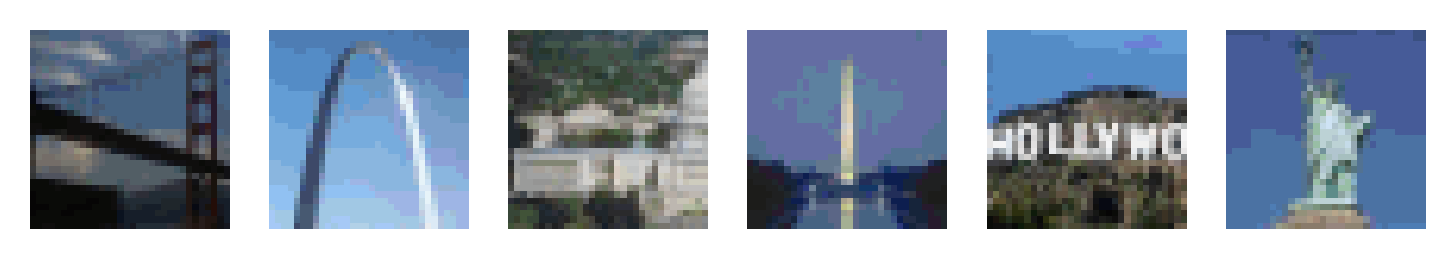

09/04 03:41:45 PM: Loading embeddings for foreign from file


foreign


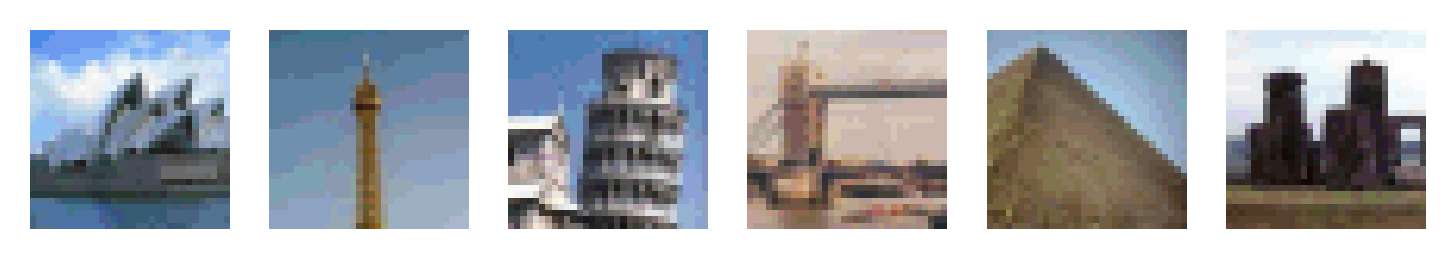

09/04 03:41:46 PM: Running test
09/04 03:41:46 PM: Computing cosine similarities...
09/04 03:41:46 PM: Null hypothesis: no difference between european-american and asian-american in association to attributes american and foreign
09/04 03:41:46 PM: Computing pval...
09/04 03:41:46 PM: Using non-parametric test
09/04 03:41:46 PM: Using exact test (924 partitions)
09/04 03:41:46 PM: Equalities contributed 1/924 to p-value
09/04 03:41:46 PM: pval: 0.680736
09/04 03:41:46 PM: computing effect size...
09/04 03:41:46 PM: esize: -0.274466


(-0.27446586994280064, 0.6807359307359307)

In [36]:
test(
    "data/experiments/asian/european-american",
    "data/experiments/asian/asian-american",
    "data/experiments/asian/american",
    "data/experiments/asian/foreign",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

In [16]:
# to download from colab
from google.colab import files

files.download("embeddings/asian_l.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Flower-Insect**

09/04 03:41:46 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:49 PM: Loading embeddings for flower from file


flower


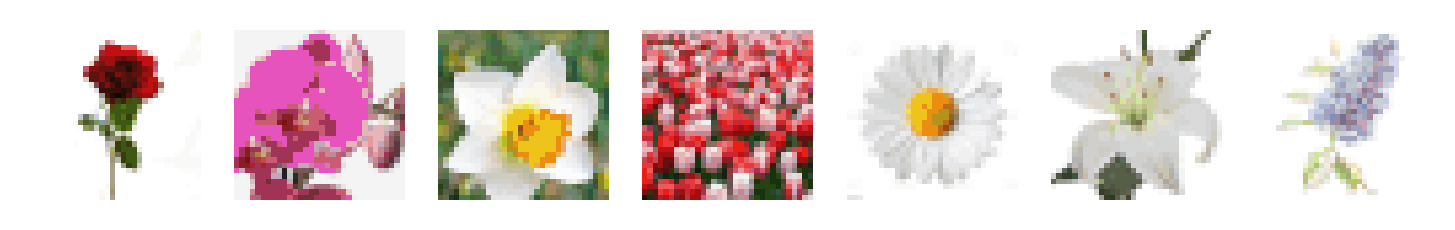

09/04 03:41:50 PM: Loading embeddings for insect from file


insect


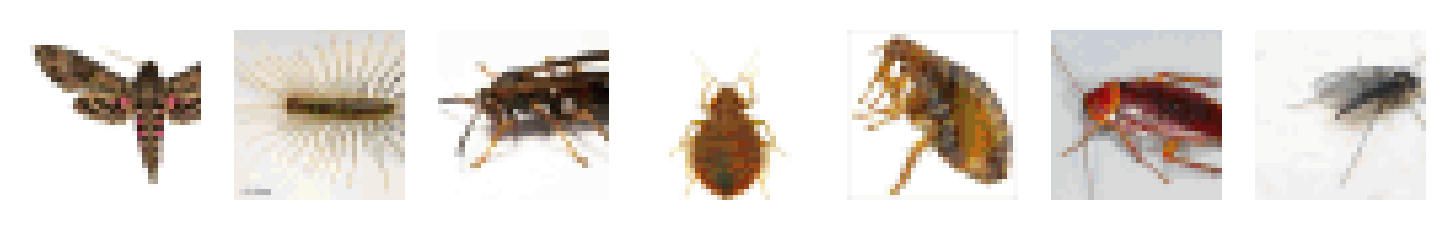

09/04 03:41:50 PM: Loading embeddings for pleasant-1 from file


pleasant-1


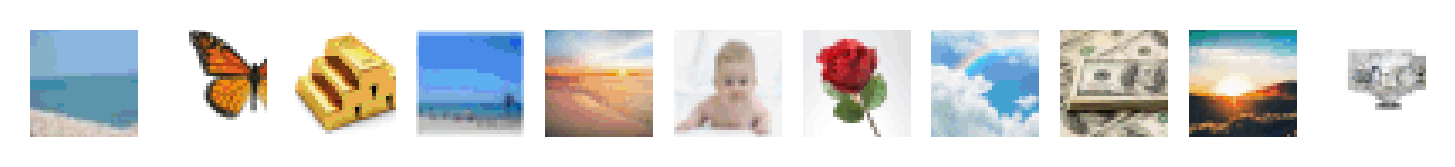

09/04 03:41:51 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


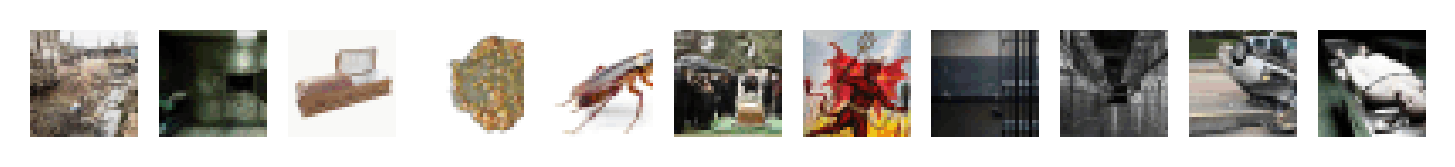

09/04 03:41:52 PM: Running test
09/04 03:41:52 PM: Computing cosine similarities...
09/04 03:41:52 PM: Null hypothesis: no difference between flower and insect in association to attributes pleasant-1 and unpleasant-1
09/04 03:41:52 PM: Computing pval...
09/04 03:41:52 PM: Using non-parametric test
09/04 03:41:52 PM: Using exact test (3432 partitions)
09/04 03:41:52 PM: Equalities contributed 1/3432 to p-value
09/04 03:41:52 PM: pval: 0.517774
09/04 03:41:52 PM: computing effect size...
09/04 03:41:52 PM: esize: -0.418417


(-0.41841712378511503, 0.5177738927738927)

In [37]:
from ieat.api import test

test(
    "data/experiments/insect-flower/flower",
    "data/experiments/insect-flower/insect",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

In [ ]:
# to download from colab
from google.colab import files

files.download("embeddings/insect-flower_l.csv")

**Weight**

09/04 03:41:52 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:55 PM: Loading embeddings for fat from file


fat


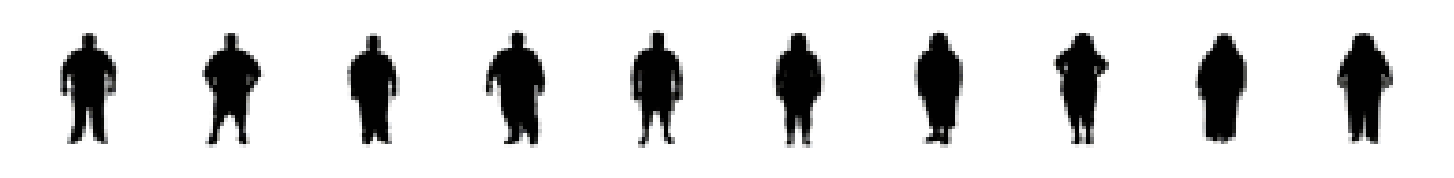

09/04 03:41:56 PM: Loading embeddings for thin from file


thin


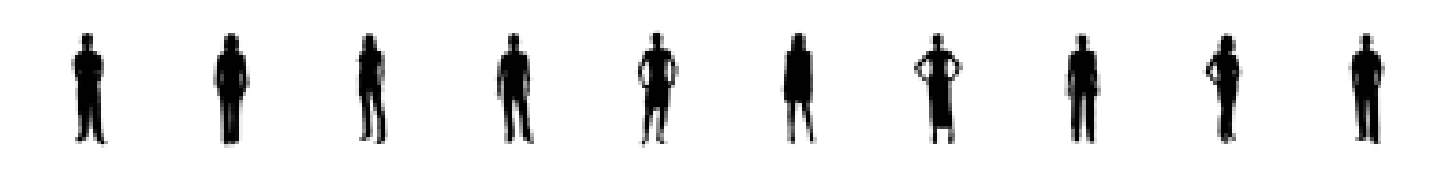

09/04 03:41:57 PM: Loading embeddings for pleasant-1 from file


pleasant-1


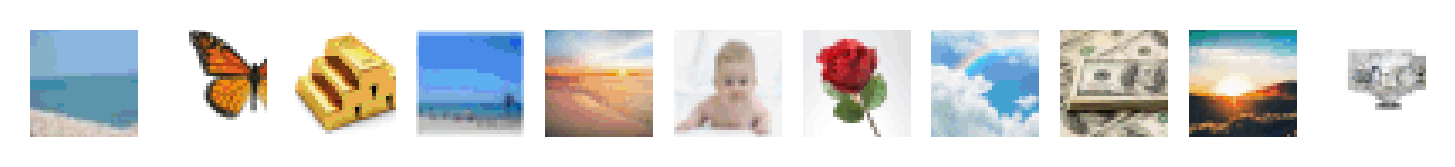

09/04 03:41:57 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


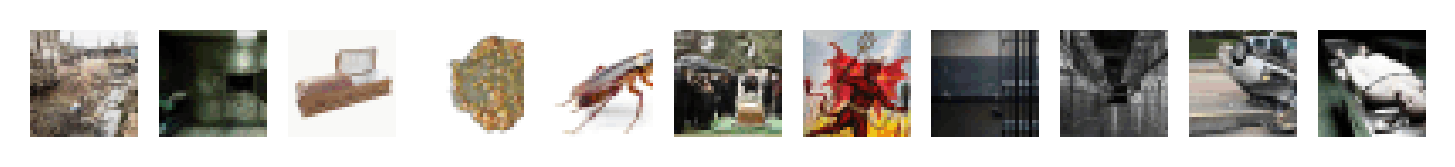

09/04 03:41:58 PM: Running test
09/04 03:41:58 PM: Computing cosine similarities...
09/04 03:41:58 PM: Null hypothesis: no difference between fat and thin in association to attributes pleasant-1 and unpleasant-1
09/04 03:41:58 PM: Computing pval...
09/04 03:41:58 PM: Using non-parametric test
09/04 03:41:58 PM: Drawing 9999 samples (and biasing by 1)
09/04 03:41:58 PM: pval: 0.2205
09/04 03:41:58 PM: computing effect size...
09/04 03:41:58 PM: esize: 0.358437


(0.3584369233429654, 0.2205)

In [38]:
from ieat.api import test

test(
    "data/experiments/weight/fat",
    "data/experiments/weight/thin",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

In [ ]:
# to download from colab
from google.colab import files

files.download("embeddings/weight_l.csv")

**Skin-Tone**

09/04 03:41:58 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:42:01 PM: Loading embeddings for light from file


light


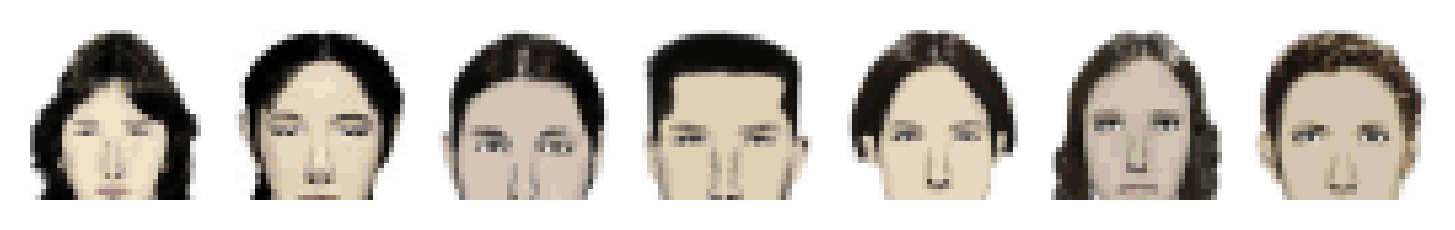

09/04 03:42:02 PM: Loading embeddings for dark from file


dark


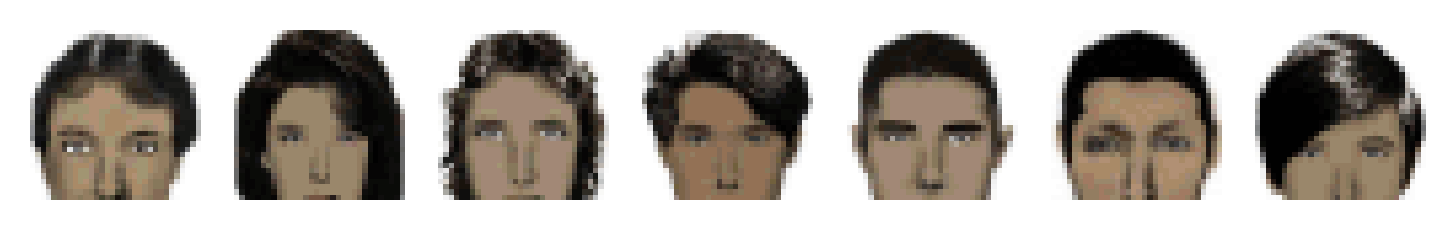

09/04 03:42:02 PM: Loading embeddings for pleasant-1 from file


pleasant-1


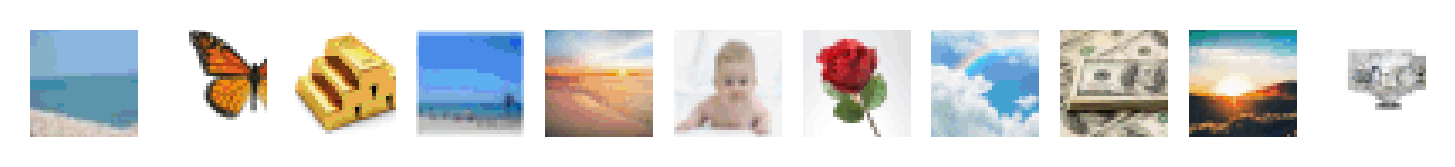

09/04 03:42:03 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


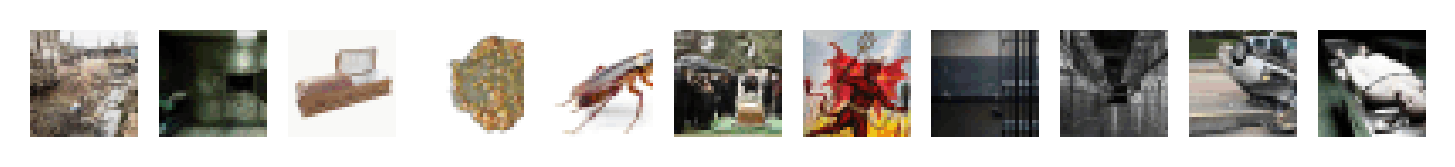

09/04 03:42:04 PM: Running test
09/04 03:42:04 PM: Computing cosine similarities...
09/04 03:42:04 PM: Null hypothesis: no difference between light and dark in association to attributes pleasant-1 and unpleasant-1
09/04 03:42:04 PM: Computing pval...
09/04 03:42:04 PM: Using non-parametric test
09/04 03:42:04 PM: Using exact test (3432 partitions)
09/04 03:42:04 PM: Equalities contributed 1/3432 to p-value
09/04 03:42:04 PM: pval: 0.462121
09/04 03:42:04 PM: computing effect size...
09/04 03:42:04 PM: esize: 0.402461


(0.4024610620400982, 0.4621212121212121)

In [39]:
from ieat.api import test

test(
    "data/experiments/skin-tone/light",
    "data/experiments/skin-tone/dark",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

In [ ]:
# to download from colab
from google.colab import files

files.download("embeddings/skin-tone_l.csv")

**Disability**

09/04 03:42:04 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:42:07 PM: Loading embeddings for abled from file


abled


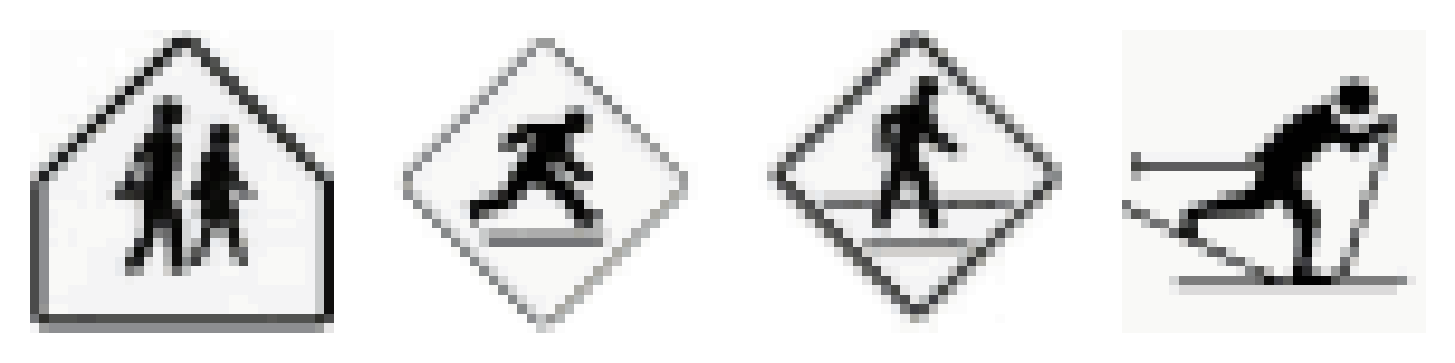

09/04 03:42:08 PM: Loading embeddings for disabled from file


disabled


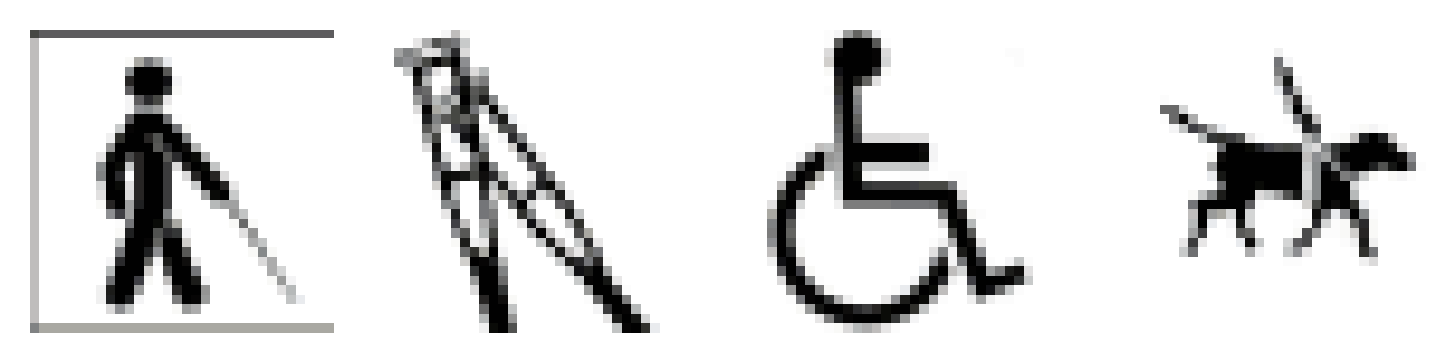

09/04 03:42:08 PM: Loading embeddings for pleasant-1 from file


pleasant-1


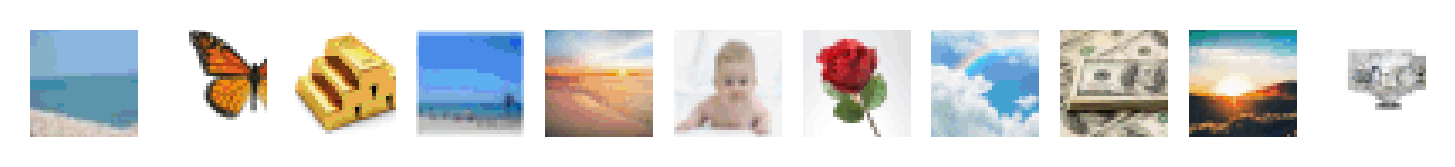

09/04 03:42:09 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


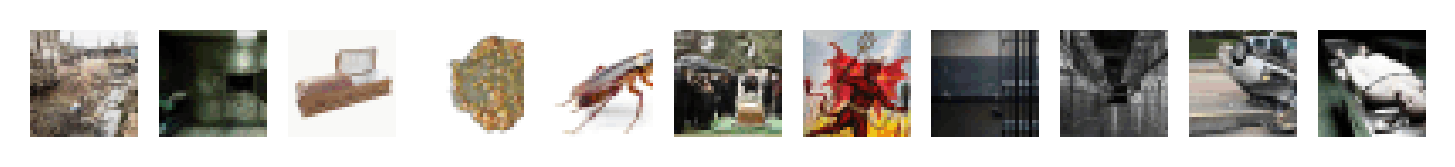

09/04 03:42:09 PM: Running test
09/04 03:42:09 PM: Computing cosine similarities...
09/04 03:42:09 PM: Null hypothesis: no difference between abled and disabled in association to attributes pleasant-1 and unpleasant-1
09/04 03:42:09 PM: Computing pval...
09/04 03:42:09 PM: Using non-parametric test
09/04 03:42:09 PM: Using exact test (70 partitions)
09/04 03:42:09 PM: Equalities contributed 1/70 to p-value
09/04 03:42:09 PM: pval: 0.285714
09/04 03:42:09 PM: computing effect size...
09/04 03:42:09 PM: esize: 0.677823


(0.6778225298294104, 0.2857142857142857)

In [40]:
from ieat.api import test

test(
    "data/experiments/disabled/abled",
    "data/experiments/disabled/disabled",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

In [ ]:
# to download from colab
from google.colab import files

files.download("embeddings/disabled_l.csv")

**Presidents**

09/04 03:42:09 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:42:13 PM: Loading embeddings for trump from file


trump


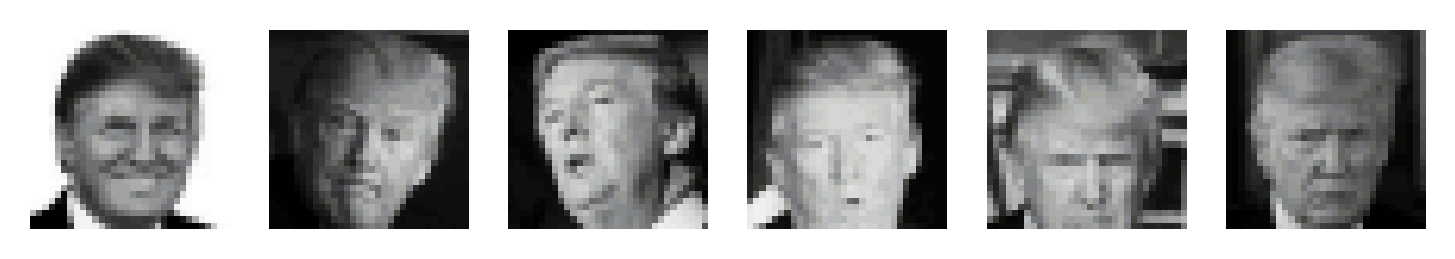

09/04 03:42:13 PM: Loading embeddings for kennedy from file


kennedy


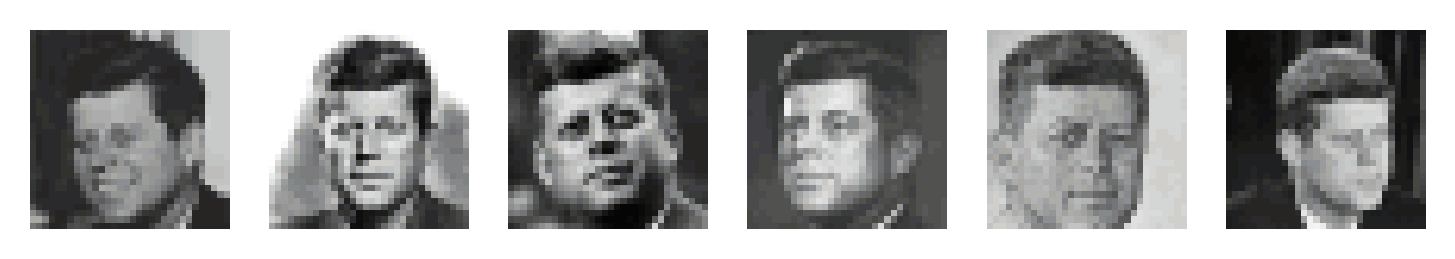

09/04 03:42:14 PM: Loading embeddings for pleasant-1 from file


pleasant-1


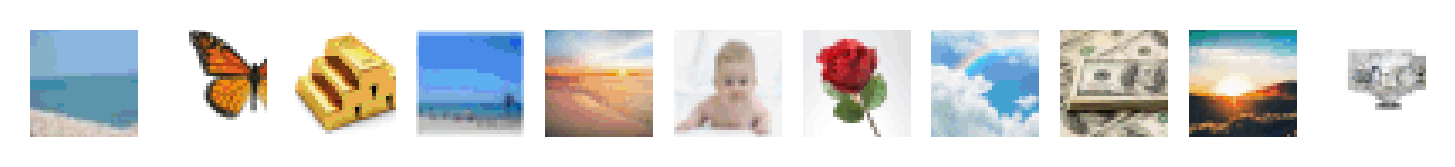

09/04 03:42:14 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


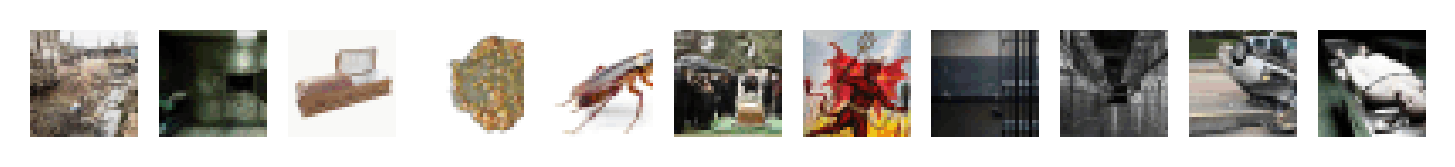

09/04 03:42:15 PM: Running test
09/04 03:42:15 PM: Computing cosine similarities...
09/04 03:42:15 PM: Null hypothesis: no difference between trump and kennedy in association to attributes pleasant-1 and unpleasant-1
09/04 03:42:15 PM: Computing pval...
09/04 03:42:15 PM: Using non-parametric test
09/04 03:42:15 PM: Using exact test (924 partitions)
09/04 03:42:15 PM: Equalities contributed 1/924 to p-value
09/04 03:42:15 PM: pval: 0.123377
09/04 03:42:15 PM: computing effect size...
09/04 03:42:15 PM: esize: 0.698766


(0.6987663689139183, 0.12337662337662338)

In [41]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/kennedy",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

09/04 03:42:15 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:42:18 PM: Loading embeddings for trump from file


trump


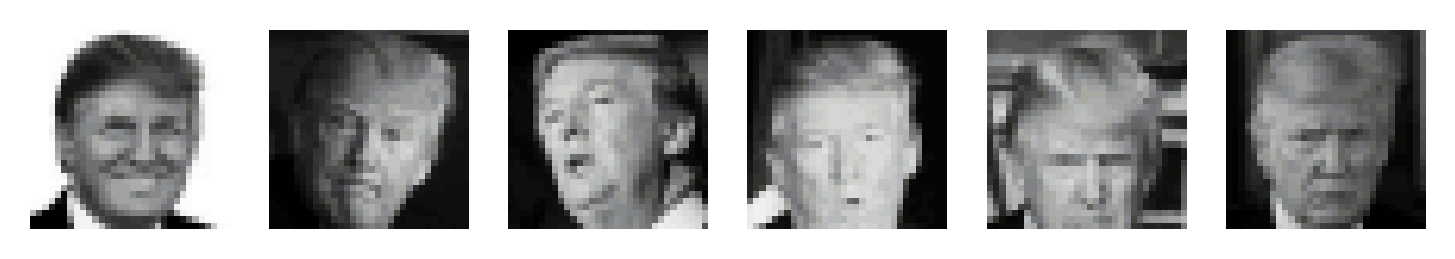

09/04 03:42:19 PM: Loading embeddings for clinton from file


clinton


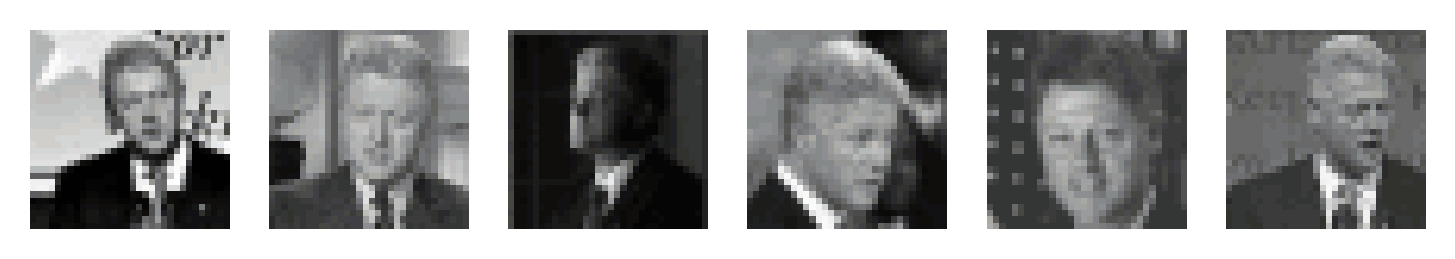

09/04 03:42:19 PM: Loading embeddings for pleasant-1 from file


pleasant-1


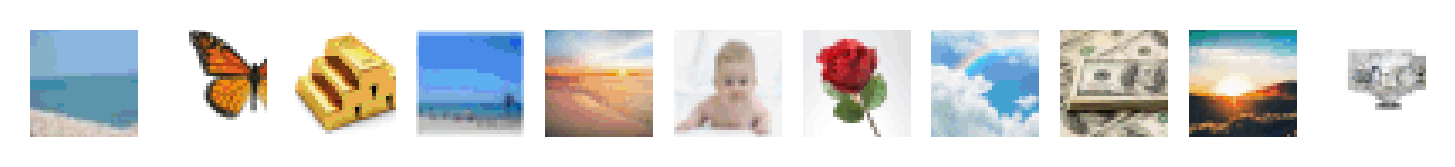

09/04 03:42:20 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


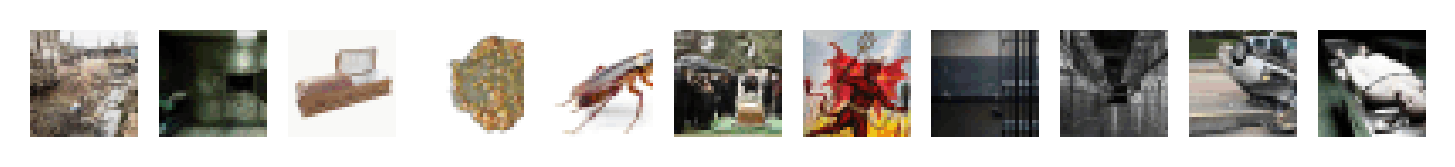

09/04 03:42:21 PM: Running test
09/04 03:42:21 PM: Computing cosine similarities...
09/04 03:42:21 PM: Null hypothesis: no difference between trump and clinton in association to attributes pleasant-1 and unpleasant-1
09/04 03:42:21 PM: Computing pval...
09/04 03:42:21 PM: Using non-parametric test
09/04 03:42:21 PM: Using exact test (924 partitions)
09/04 03:42:21 PM: Equalities contributed 1/924 to p-value
09/04 03:42:21 PM: pval: 0.0616883
09/04 03:42:21 PM: computing effect size...
09/04 03:42:21 PM: esize: 0.921405


(0.9214051758589848, 0.06168831168831169)

In [42]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/clinton",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

In [ ]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/bush",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

09/04 03:42:26 PM: loading weights file models/s/model.ckpt-1000000.index


09/04 03:41:12 PM: loading weights file models/s/model.ckpt-1000000.index
09/04 03:41:16 PM: Loading embeddings for trump from file


trump


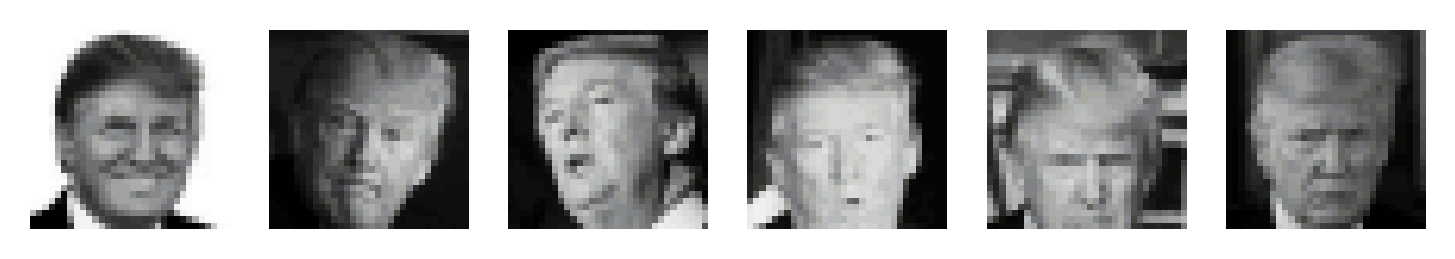

09/04 03:41:16 PM: Loading embeddings for lincoln from file


lincoln


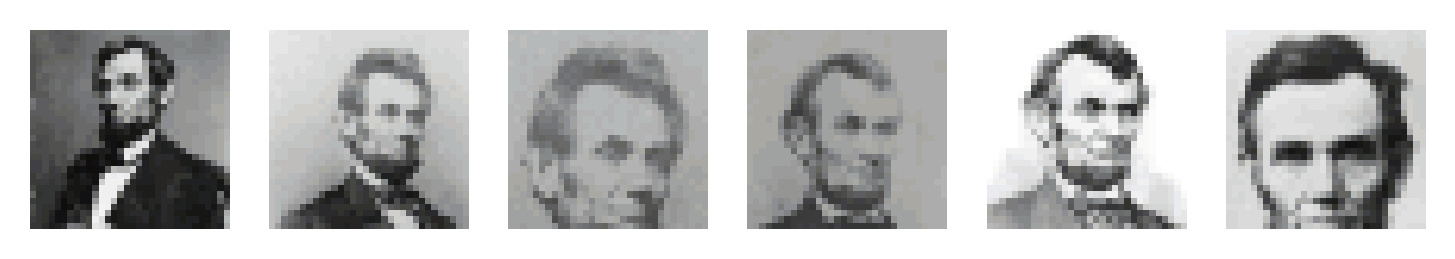

09/04 03:41:16 PM: Loading embeddings for pleasant-1 from file


pleasant-1


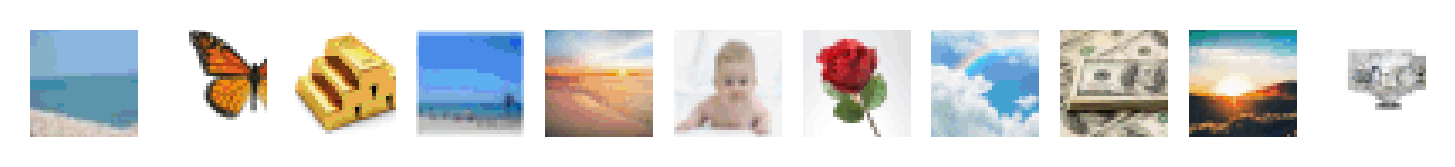

09/04 03:41:17 PM: Loading embeddings for unpleasant-1 from file


unpleasant-1


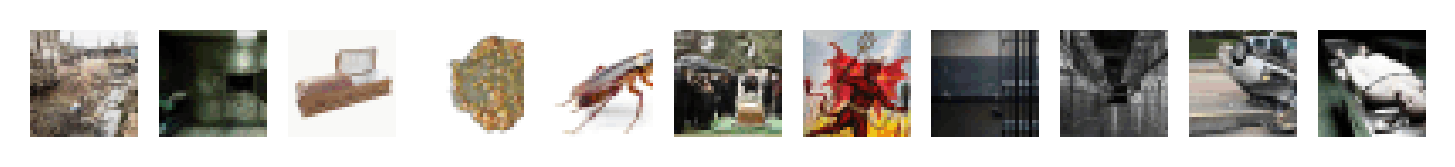

09/04 03:41:18 PM: Running test
09/04 03:41:18 PM: Computing cosine similarities...
09/04 03:41:18 PM: Null hypothesis: no difference between trump and lincoln in association to attributes pleasant-1 and unpleasant-1
09/04 03:41:18 PM: Computing pval...
09/04 03:41:18 PM: Using non-parametric test
09/04 03:41:18 PM: Using exact test (924 partitions)
09/04 03:41:18 PM: Equalities contributed 1/924 to p-value
09/04 03:41:18 PM: pval: 0.0335498
09/04 03:41:18 PM: computing effect size...
09/04 03:41:18 PM: esize: 1.05198


(1.05198421051702, 0.03354978354978355)

In [33]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/lincoln",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)